In [1]:
# Import necessary libraries
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import roc_auc_score



In [2]:
cwd = os.getcwd()

df = pd.read_csv("filtered_customer_booking.csv", index_col=0)

df = df.reset_index(drop=True)
df_final = df.copy()

In [3]:
# One hot encode the categorical columns
encoder = OneHotEncoder(handle_unknown='ignore')

# One-hot encode sales_channel
encoder_df = pd.DataFrame(encoder.fit_transform(df[['sales_channel']]).toarray(), columns=['Internet', 'Mobile'])
df_final = pd.concat([df_final, encoder_df], axis=1)

# One-hot encode trip_type
encoder_df = pd.DataFrame(encoder.fit_transform(df[['trip_type']]).toarray(), columns=['RoundTRip', 'OneWayTrip', 'CircleTrip'])
df_final = pd.concat([df_final, encoder_df], axis=1)

In [4]:
# Drop categorical columns
df_final.drop(['sales_channel', 'trip_type', 'booking_origin', 'route'], axis=1, inplace=True)


In [5]:
# Store the label for supervised learning
label = df['booking_complete']

df_final.drop('booking_complete', axis=1, inplace=True)


In [6]:

# Create a standard scaler object
scaler = StandardScaler()


In [7]:
# Fit and transform the data
scaled_df = pd.DataFrame(scaler.fit_transform(df_final), columns=df_final.columns)


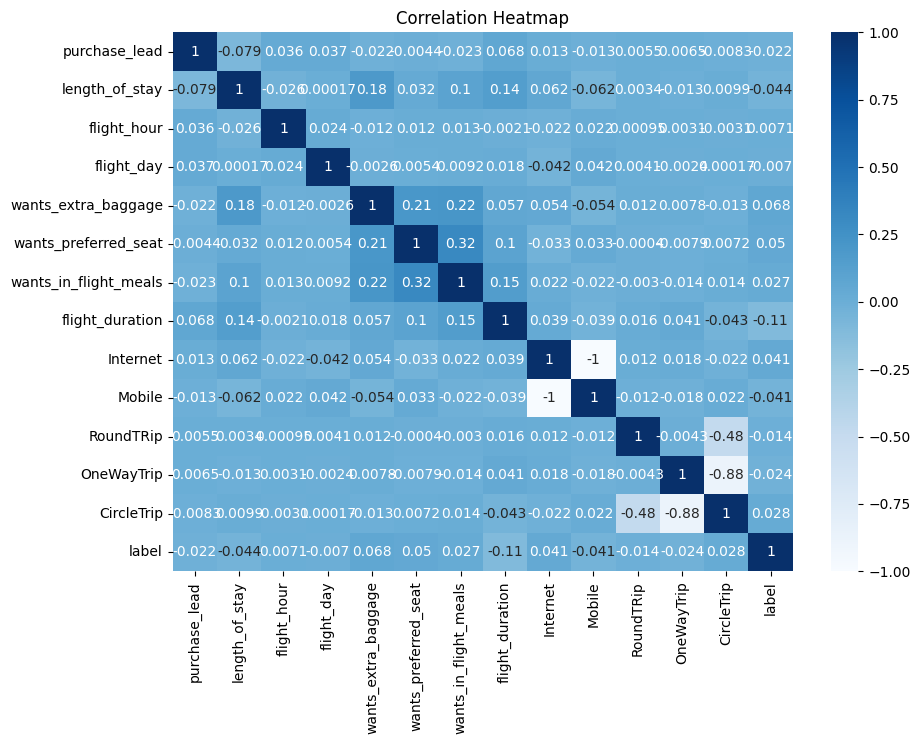

In [8]:
# Add the labels back to the dataframe
scaled_df['label'] = label

corr = scaled_df.corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title("Correlation Heatmap")

X = scaled_df.iloc[:, :-1].values
y = scaled_df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    train_f1 = f1_score(y_train, y_pred_train)
    test_f1 = f1_score(y_test, y_pred_test)

    train_precision = precision_score(y_train, y_pred_train)
    test_precision = precision_score(y_test, y_pred_test)

    train_recall = recall_score(y_train, y_pred_train)
    test_recall = recall_score(y_test, y_pred_test)

    train_confusion_matrix = confusion_matrix(y_train, y_pred_train)
    test_confusion_matrix = confusion_matrix(y_test, y_pred_test)

    return (train_accuracy, test_accuracy, train_f1, test_f1, train_precision, test_precision, train_recall, test_recall,
            train_confusion_matrix, test_confusion_matrix)

clf_rf = RandomForestClassifier(n_estimators=50, max_depth=50, min_samples_split=5, random_state=0)

(train_accuracy, test_accuracy, train_f1, test_f1, train_precision, test_precision, train_recall, test_recall,
 train_confusion_matrix, test_confusion_matrix) = evaluate_model(clf_rf, X_train, y_train, X_test, y_test)


Text(0.5, 1.0, 'Feature Importance')

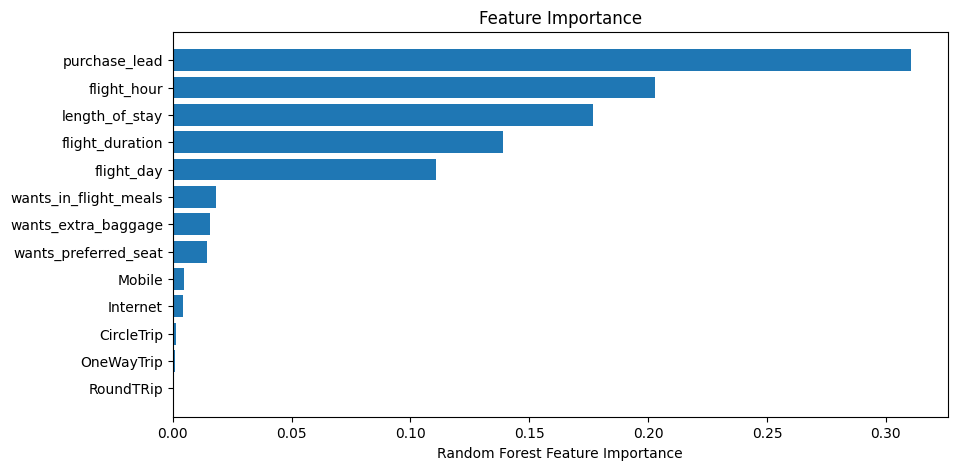

In [9]:
plt.figure(figsize=(10, 5))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:, :-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance")

In [10]:
print(f"Accuracy, precision, recall, and F1-score for training data are {train_accuracy:.2f}, "
      f"{train_precision:.2f}, {train_recall:.2f}, {train_f1:.2f} respectively")
print(f"Accuracy, precision, recall, and F1-score for test data are {test_accuracy:.2f}, "
      f"{test_precision:.2f}, {test_recall:.2f}, {test_f1:.2f} respectively")


Accuracy, precision, recall, and F1-score for training data are 0.93, 1.00, 0.55, 0.71 respectively
Accuracy, precision, recall, and F1-score for test data are 0.85, 0.42, 0.05, 0.09 respectively


Text(95.72222222222221, 0.5, 'True Label')

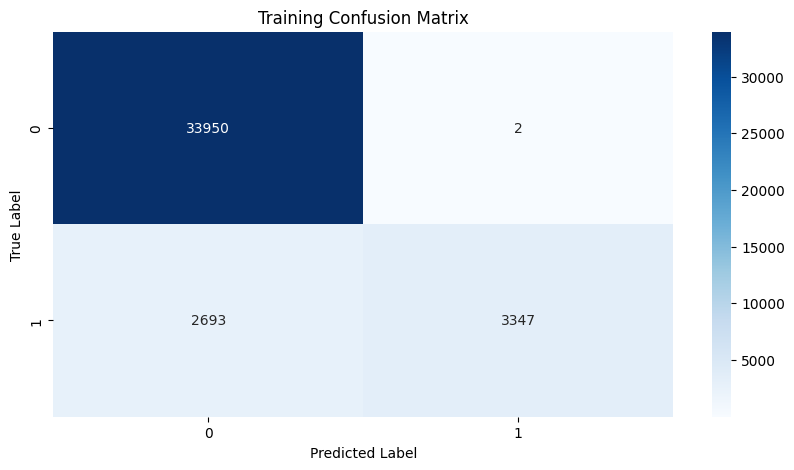

In [11]:
plt.figure(figsize=(10, 5))
sns.heatmap(train_confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Training Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

Text(95.72222222222221, 0.5, 'True Label')

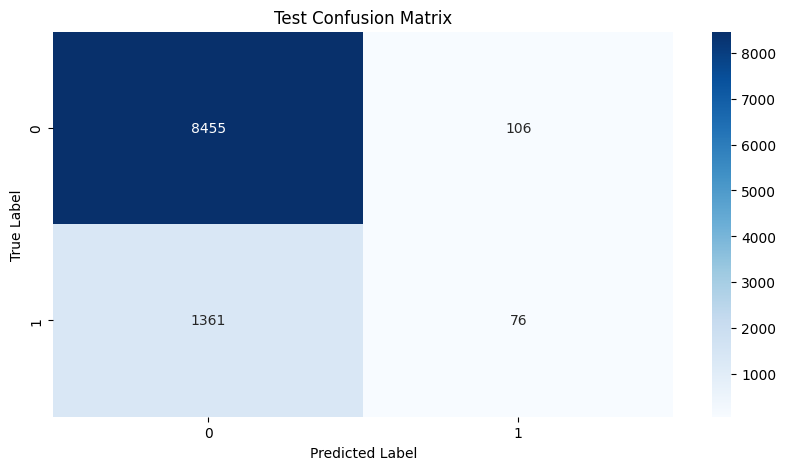

In [12]:
plt.figure(figsize=(10, 5))
sns.heatmap(test_confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

Text(0.5, 0, 'Random Forest Feature Importance')

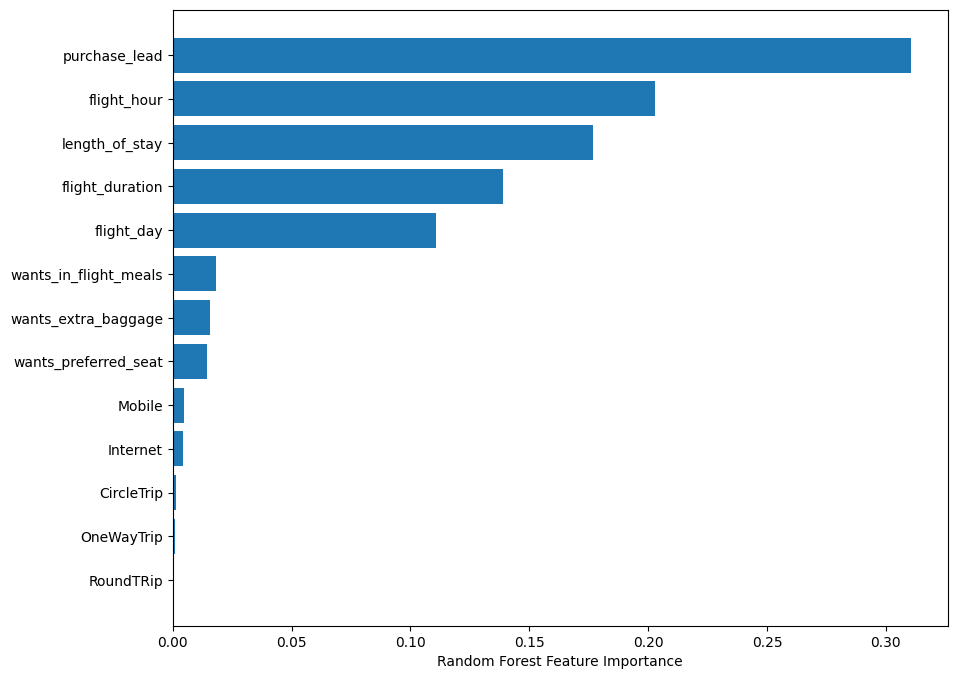

In [13]:
plt.figure(figsize=(10,8))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [18]:
# Train the model and predict probabilities
clf_rf.fit(X_train, y_train)
y_prob_train = clf_rf.predict_proba(X_train)[:, 1]
y_prob_test = clf_rf.predict_proba(X_test)[:, 1]

# Predict classes
y_pred_train = clf_rf.predict(X_train)
y_pred_test = clf_rf.predict(X_test)

# Calculate accuracy
accuracy_train = accuracy_score(y_train, y_pred_train) * 100
accuracy_test = accuracy_score(y_test, y_pred_test) * 100

# Calculate AUC score
auc_train = roc_auc_score(y_train, y_prob_train) * 100
auc_test = roc_auc_score(y_test, y_prob_test) * 100

# Print the results
print("Accuracy - Train: {:.2f}%, Test: {:.2f}%".format(accuracy_train, accuracy_test))
print("AUC Score - Train: {:.2f}%, Test: {:.2f}%".format(auc_train, auc_test))


Accuracy - Train: 93.26%, Test: 85.33%
AUC Score - Train: 99.90%, Test: 64.82%
